# 🛠️ Preparación de los Datos

##Extracción del Archivo Tratado

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Leer csv
df = pd.read_csv('/content/mi_dataframe.csv')
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [ ]:
df=df.drop(columns=['customerid'])

##Encoding

In [ ]:
# Add the 'churn_num' column before encoding
df['churn_num'] = df['churn'].map({'no': 0, 'yes': 1})

# Perform one-hot encoding after adding 'churn_num', keeping 'churn_num'
df_encoded = pd.get_dummies(df.drop(columns=['churn']), drop_first=True)

In [ ]:
print(df_encoded.head())
print(df_encoded.shape)

   seniorcitizen  tenure  charges_monthly  charges_total  cuentas_diarias  \
0              0       9             65.6         593.30         2.186667   
1              0       9             59.9         542.40         1.996667   
2              0       4             73.9         280.85         2.463333   
3              1      13             98.0        1237.85         3.266667   
4              1       3             83.9         267.40         2.796667   

   churn_yes  gender_male  partner_yes  dependents_yes  phoneservice_yes  ...  \
0      False        False         True            True              True  ...   
1      False         True        False           False              True  ...   
2       True         True        False           False              True  ...   
3       True         True         True           False              True  ...   
4       True        False         True           False              True  ...   

   streamingtv_no internet service  streamingtv_ye

##Verificación de la Proporción de Cancelación (Churn)

In [ ]:
df['churn'].value_counts(normalize=True)

,proportion
churn,
no,0.73463
yes,0.26537


In [ ]:
df['churn_num'] = df['churn'].map({'no': 0, 'yes': 1})

In [ ]:
df_model = df.drop(columns=['churn'])

# 🎯 Correlación y Selección de Variables

##Análisis de Correlación

In [ ]:
num_cols = ['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias', 'churn_num']

In [ ]:
corr_matrix = df[num_cols].corr()

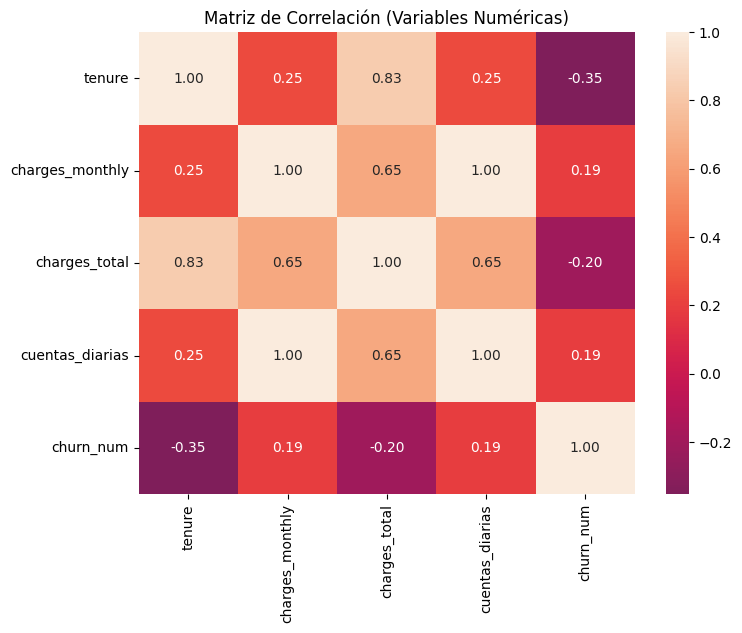

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', center=0, fmt=".2f")
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

##Análisis Dirigido

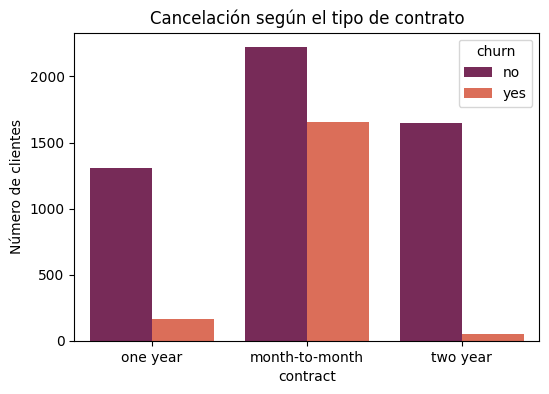

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='contract', hue='churn', data=df, palette='rocket')
plt.title("Cancelación según el tipo de contrato")
plt.ylabel("Número de clientes")
plt.show()

/tmp/ipython-input-970951858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='charges_total', data=df,palette='rocket')


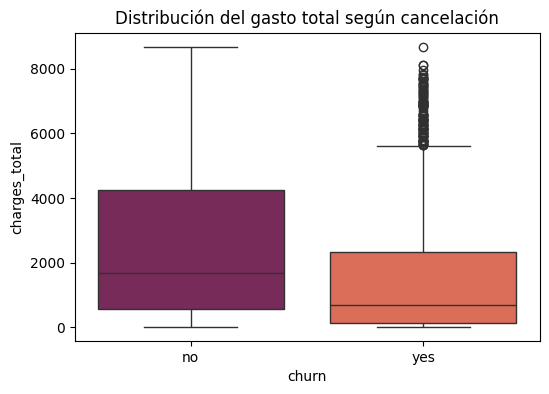

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='charges_total', data=df,palette='rocket')
plt.title("Distribución del gasto total según cancelación")
plt.show()

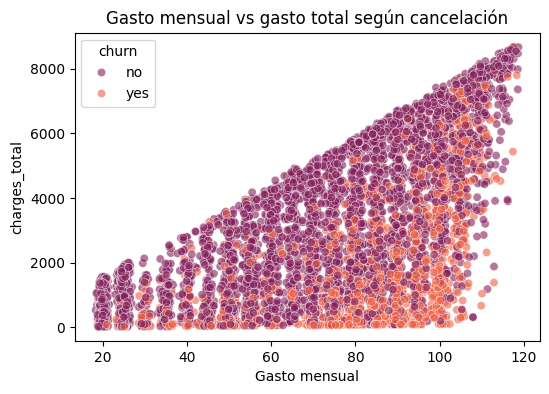

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='charges_monthly', y='charges_total', hue='churn', data=df, alpha=0.6, palette='rocket')
plt.xlabel("Gasto mensual")

plt.title("Gasto mensual vs gasto total según cancelación")
plt.show()

# 🤖 Modelado Predictivo

##Creación de Modelos

In [ ]:
X = df_encoded.drop('churn_num', axis=1)
y = df_encoded['churn_num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


###Modelo 1: Regresión Logística con estandarización

En regresión logística si las variables tiene una gran diferencia entre los valores, el modelo se enfocará en el de valores grandes por la magnitud. La estandarización pone todas las variables en la misma escala

In [ ]:
train_combined = X_train.copy()
train_combined['churn_num'] = y_train
train_combined.dropna(inplace=True)
test_combined = X_test.copy()
test_combined['churn_num'] = y_test
test_combined.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()

# Combine X and y to drop corresponding rows with missing values
train_combined = X_train.copy()
train_combined['churn_num'] = y_train

test_combined = X_test.copy()
test_combined['churn_num'] = y_test

# Drop rows with missing values
train_combined.dropna(inplace=True)
test_combined.dropna(inplace=True)

# Separate X and y again
X_train_scaled = scaler.fit_transform(train_combined.drop('churn_num', axis=1))
y_train = train_combined['churn_num']

X_test_scaled = scaler.transform(test_combined.drop('churn_num', axis=1))
y_test = test_combined['churn_num']


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Modelo 1: Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Display coefficients after the model is trained
coeficientes = pd.DataFrame({
    'Variable': train_combined.drop('churn_num', axis=1).columns,
    'Coeficiente': log_model.coef_[0]
})

coeficientes['Abs'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values('Abs', ascending=False)
print("\nCoeficientes de la Regresión Logística:\n", coeficientes)

Modelo 1: Regresión Logística
Accuracy: 0.7926136363636364
[[921 113]
 [179 195]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1034
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1408
   macro avg       0.74      0.71      0.72      1408
weighted avg       0.78      0.79      0.79      1408


Coeficientes de la Regresión Logística:
                                  Variable  Coeficiente       Abs
1                                  tenure    -1.430456  1.430456
3                           charges_total     0.696500  0.696500
11            internetservice_fiber optic     0.607797  0.607797
26                      contract_two year    -0.570644  0.570644
4                         cuentas_diarias    -0.310531  0.310531
2                         charges_monthly    -0.310531  0.310531
25                      contract_one year    -0.277809  0.277809
22                        str

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_clean)
y_pred_log = log_model.predict(X_test_scaled)

print("Modelo 1: Regresión Logística")
print("Accuracy:", accuracy_score(y_test_clean, y_pred_log))
print(confusion_matrix(y_test_clean, y_pred_log))
print(classification_report(y_test_clean, y_pred_log))


Modelo 1: Regresión Logística
Accuracy: 0.7926136363636364
[[921 113]
 [179 195]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1034
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1408
   macro avg       0.74      0.71      0.72      1408
weighted avg       0.78      0.79      0.79      1408



### Modelo 2: Árbol de desición

In [103]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train_clean, y_train_clean)
y_pred_tree = tree_model.predict(X_test_clean)
print("\nModelo 2: Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test_clean, y_pred_tree))
print(confusion_matrix(y_test_clean, y_pred_tree))
print(classification_report(y_test_clean, y_pred_tree))


Modelo 2: Árbol de Decisión
Accuracy: 0.7819602272727273
[[880 154]
 [153 221]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1034
           1       0.59      0.59      0.59       374

    accuracy                           0.78      1408
   macro avg       0.72      0.72      0.72      1408
weighted avg       0.78      0.78      0.78      1408



##Separación de Datos

In [104]:
#70/30
X = df_encoded.drop('churn_num', axis=1)
y = df_encoded['churn_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 4930
Tamaño del conjunto de prueba: 2113


In [105]:
#80/20
X = df_encoded.drop('churn_num', axis=1)
y = df_encoded['churn_num']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])


print("\nProporción de churn en entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporción de churn en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: 5634
Tamaño del conjunto de prueba: 1409

Proporción de churn en entrenamiento:
churn_num
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Proporción de churn en prueba:
churn_num
0    0.734564
1    0.265436
Name: proportion, dtype: float64


##Evaluación de los Modelos

In [106]:
print("Modelo 1: Regresión Logística")
print("Accuracy:", accuracy_score(y_test_clean, y_pred_log))
print(confusion_matrix(y_test_clean, y_pred_log))
print(classification_report(y_test_clean, y_pred_log))

Modelo 1: Regresión Logística
Accuracy: 0.7926136363636364
[[921 113]
 [179 195]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1034
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1408
   macro avg       0.74      0.71      0.72      1408
weighted avg       0.78      0.79      0.79      1408



In [107]:
print("\nModelo 2: Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test_clean, y_pred_tree))
print(confusion_matrix(y_test_clean, y_pred_tree))
print(classification_report(y_test_clean, y_pred_tree))


Modelo 2: Árbol de Decisión
Accuracy: 0.7819602272727273
[[880 154]
 [153 221]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1034
           1       0.59      0.59      0.59       374

    accuracy                           0.78      1408
   macro avg       0.72      0.72      0.72      1408
weighted avg       0.78      0.78      0.78      1408



Matriz Regresión Logística:
 [[921 113]
 [179 195]]


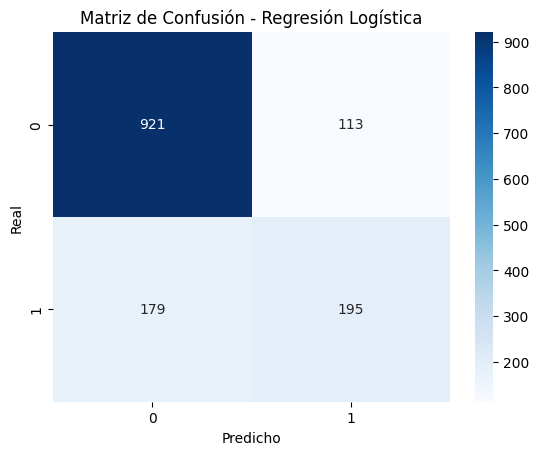

Matriz Árbol de Decisión:
 [[880 154]
 [153 221]]


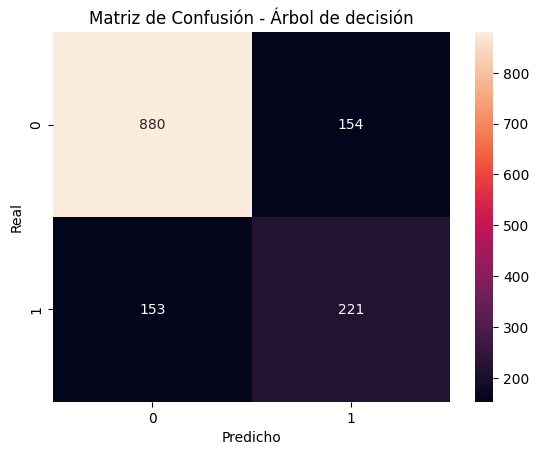

In [108]:
#Matriz de confusión

# Para Regresión Logística
matriz_rl = confusion_matrix(y_test_clean, y_pred_log)
print("Matriz Regresión Logística:\n", matriz_rl)
sns.heatmap(matriz_rl, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Para Árbol de Decisión
matriz_tree = confusion_matrix(y_test_clean, y_pred_tree)
print("Matriz Árbol de Decisión:\n", matriz_tree)
sns.heatmap(matriz_tree, annot=True, fmt='d', cmap='rocket')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de decisión')
plt.show()

¿Cuál modelo tuvo el mejor desempeño?

Esto tiene mucho que ver con el enfoque se desee elegir, ya que si se prioriza evitar falsos positivos (ej., no molestar a clientes leales),se debe de eligir Regresión Logística.
En cambio si se necesita detectar más "Evasión" (churn), (aunque con más falsas alarmas), se debe de eligir el Árbol de Decisión.


¿Algún modelo presentó overfitting o underfitting?

El árbol de decisión presento un posible overfitting,una solución podría ser **Usar min_samples_split** para evitar divisiones muy específicas.


In [114]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)

#📋Interpretación y Conclusiones

##Análisis de la Importancia de las Variables

In [115]:
#Regresión Logística
log_model.fit(X_train_scaled, y_train_clean)

coeficientes = pd.DataFrame({
    'Variable': X_train_clean.columns,
    'Coeficiente': log_model.coef_[0]
})


coeficientes['Abs'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values('Abs', ascending=False)
print(coeficientes)

                                 Variable  Coeficiente       Abs
1                                  tenure    -1.309546  1.309546
11            internetservice_fiber optic     0.693521  0.693521
3                           charges_total     0.632582  0.632582
26                      contract_two year    -0.597236  0.597236
4                         cuentas_diarias    -0.432628  0.432628
2                         charges_monthly    -0.432628  0.432628
25                      contract_one year    -0.284827  0.284827
22                        streamingtv_yes     0.252861  0.252861
24                    streamingmovies_yes     0.205329  0.205329
10                      multiplelines_yes     0.201707  0.201707
29         paymentmethod_electronic check     0.199117  0.199117
27                   paperlessbilling_yes     0.168173  0.168173
20                        techsupport_yes    -0.120831  0.120831
13     onlinesecurity_no internet service    -0.089812  0.089812
12                     in

In [116]:
#Arból de confusión
tree_model.fit(X_train_clean, y_train_clean)

importancia = pd.DataFrame({
    'Variable': X_train_clean.columns,
    'Importancia': tree_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print(importancia)

                                 Variable  Importancia
1                                  tenure     0.444901
11            internetservice_fiber optic     0.331389
3                           charges_total     0.042420
15       onlinebackup_no internet service     0.034956
29         paymentmethod_electronic check     0.033359
4                         cuentas_diarias     0.027772
26                      contract_two year     0.021321
10                      multiplelines_yes     0.020124
25                      contract_one year     0.009833
12                     internetservice_no     0.009221
20                        techsupport_yes     0.006850
16                       onlinebackup_yes     0.006110
0                           seniorcitizen     0.006079
8                        phoneservice_yes     0.004789
9          multiplelines_no phone service     0.000877
14                     onlinesecurity_yes     0.000000
13     onlinesecurity_no internet service     0.000000
7         

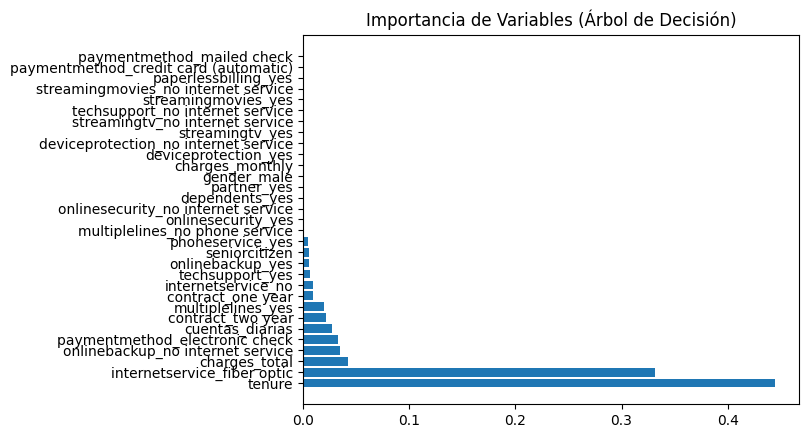

In [117]:
import matplotlib.pyplot as plt

plt.barh(importancia['Variable'], importancia['Importancia'])
plt.title('Importancia de Variables (Árbol de Decisión)')
plt.show()

##Conclusión

**PRINCIPALES FACTORES DE CANCELACIÓN (CHURN) Y ESTRATEGIAS DE RETENCIÓN**

**Modelos evaluados:** Regresión Logística y Árbol de confusión.

**Objetivo:** Identificar variables críticas y proponer acciones para reducir el churn.

---

**Resultado del analisis**

Los modelos destacan 3 factores clave que impulsan la cancelación:

- Antigüedad baja (tenure) , Clientes nuevos son 2.5x más propensos a cancelar.

- Uso de fibra óptica (internetservice_fiber optic) , 60% más riesgo vs. otros servicios.

- Facturación elevada (charges_total), Clientes con cargos altos tienen 30% más churn.
----

**Estrategias de retención**
- Se recomienda para la antigueda baja implementar la migración a contratos anuales con beneficios, por ejemplo meses gratis, precios congelados,descuentos por cierto numero de meses.
- Para usuarios de *Fibra optica*, se recomienda revisiones preventivas cada ciertos meses y ofertas exclusivas
- En cuanro a la facturación elevada se recomienda planes personalizados que incluyan straming o seguridad incluida, asi como descuentos por pagos anuales

De manera general se recomienda añadir encuestas de satisfacción post-venta, asi como Dashboard con alertas tempranas para clientes en segmentos de riesgo.
